In [2]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

In [3]:
def linreg(X,Y):
    # 跑线性回归
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # 返回回归结果和图
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # 画原始数据
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # 添加回归线，颜色设置为红色
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     65.71
Date:                Tue, 22 Aug 2017   Prob (F-statistic):           2.89e-11
Time:                        15:11:10   Log-Likelihood:                 148.38
No. Observations:                  63   AIC:                            -292.8
Df Residuals:                      61   BIC:                            -288.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0024      0.003     -0.820      0.416        -0.008     0.003
x1             0.6096      0.075      8.106      0.000         0.459     0.760
==============================================================================
Omnibus:                        1.929   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.235
Skew:                           0.096   Prob(JB):                        0.539
Kurtosis:                       3.659   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

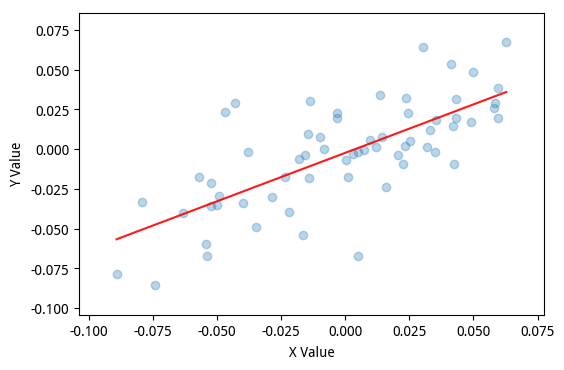

In [4]:
Stock1 = get_price("000300.XSHG",start_date='2015-05-01',end_date='2015-08-01',fields = 'ClosingPx')
Stock2 = get_price("399006.XSHE",start_date='2015-05-01',end_date='2015-08-01',fields = 'ClosingPx')

r_a = Stock1.pct_change()[1:]
r_b = Stock2.pct_change()[1:]

linreg(r_b.values, r_a.values)

/srv/env/lib64/python3.4/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   high   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     48.00
Date:                Tue, 22 Aug 2017   Prob (F-statistic):           1.59e-05
Time:                        16:37:47   Log-Likelihood:                -58.128
No. Observations:                  14   AIC:                             120.3
Df Residuals:                      12   BIC:                             121.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -348.2521    419.856     -0.829      0.423     -1263.039   566.535
low            1.1523      0.166      6.928      0.000         0.790     1.515
==============================================================================
Omnibus:                        1.777   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.381
Skew:                           0.660   Prob(JB):                        0.501
Kurtosis:                       2.209   Cond. No.                     2.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

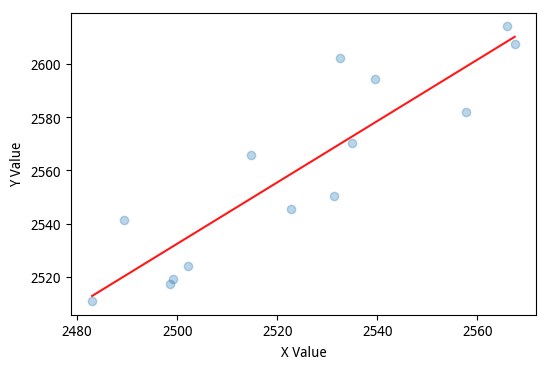

In [80]:
# 上升趋势情况下
high = get_price("000300.XSHG",start_date='2014-11-01',end_date='2014-11-20',fields = 'high')
low = get_price("000300.XSHG",start_date='2014-11-01',end_date='2014-11-20',fields = 'low')

low, high

lowList = sm.add_constant(low)
model = regression.linear_model.OLS(high, lowList).fit()
a = model.params[0]
b = model.params[1]

# 返回回归结果和图
X2 = np.linspace(low.min(), low.max(), 100)
Y_hat = X2 * b + a
Y_hat
plt.scatter(low, high, alpha=0.3) # 画原始数据
plt.plot(X2, Y_hat, 'r', alpha=0.9);  # 添加回归线，颜色设置为红色
plt.xlabel('X Value')
plt.ylabel('Y Value')
model.summary()

/srv/env/lib64/python3.4/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   high   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     9.894
Date:                Tue, 22 Aug 2017   Prob (F-statistic):            0.00845
Time:                        16:37:36   Log-Likelihood:                -48.146
No. Observations:                  14   AIC:                             100.3
Df Residuals:                      12   BIC:                             101.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1145.6316    389.065      2.945      0.012       297.933  1993.330
low            0.5230      0.166      3.145      0.008         0.161     0.885
==============================================================================
Omnibus:                        5.899   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                2.944
Skew:                          -1.054   Prob(JB):                        0.229
Kurtosis:                       3.776   Cond. No.                     4.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

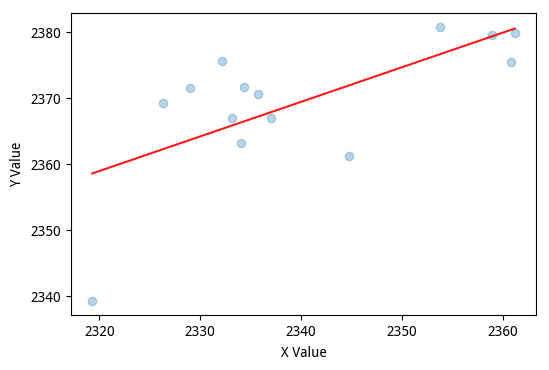

In [79]:
# 震荡情况下
high = get_price("000300.XSHG",start_date='2014-08-01',end_date='2014-08-20',fields = 'high')
low = get_price("000300.XSHG",start_date='2014-08-01',end_date='2014-08-20',fields = 'low')

low, high

lowList = sm.add_constant(low)
model = regression.linear_model.OLS(high, lowList).fit()
a = model.params[0]
b = model.params[1]

# 返回回归结果和图
X2 = np.linspace(low.min(), low.max(), 100)
Y_hat = X2 * b + a
Y_hat
plt.scatter(low, high, alpha=0.3) # 画原始数据
plt.plot(X2, Y_hat, 'r', alpha=0.9);  # 添加回归线，颜色设置为红色
plt.xlabel('X Value')
plt.ylabel('Y Value')
model.summary()